## Final Project Submission

Please fill out:
* Student name: Vanessa Mwangi
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Veronica Isiaho
* Blog post URL: 


## House Price Prediction in King County

### Introduction

The real estate industry is complex and involves many factors that can greatly influence the prices. Predicting house prices accurately can help all parties involved to make profits they are sellers or to get good deals for the real estate if they are buyers. In this project, I will be using the King County House data which contains information about prices of real estate in King County, Washington. I'll build a regression model that will predict the selling of a house based on the features. I'll use regression analysis techniques to analyze the data and come up with a model that can provide estimations of house prices. This will aim to provide insight to the factors that are influencing house prices and also help buyers and sellers to make well informed decisions.

### Challenges observed
* Lack of affordable housing due to the rapid growth in population due to more people moving to the area. Demand for houses is going higher.

* Property owners or developers might give false information about the house grade to drive the price up. The rating may also not be accurate due to other factors.

* Scarcity of available units for residence within Kings County has driven up the cost of house units between the various grades ie:average, good, excellent and luxurious.

* The disparities in the housing market play out on a sub regional basis within King County Properties located in desirable areas, such as waterfront or downtown areas are limited and highly valued.

* Limited supply of land in the region, particularly in desireable areas close to job centres and transportation. The scarcity land can limit the number of available units and drive up prices.r

### Proposed Solution
* Increase the affordable housing by researching on house features that are essential and that will not make house expensive.

* Implement tougher standards for house grading that are not dependent on developers. They used things like building codes

* Contruct high rises to counter the land scarcity

### Conclusion

Using KC House Data to predict house prices is challenging and exciting task. By using data on diffret features and characteristics of a house, I will develop a regression model that can accurately predict house prices. This will be a systematic process that entails steps such as preprocessing, model training and model tuning. The insights that will be gaioned from the model can help buyers and sellers to make well informed decisions to their advantage.

### Problem Statement

The goal in this project is to analyze the relationship between various home features and sale price of the houses in a northwestern county. My aim is to provide insights and advice to stakeholders in the real estate industry about how they can improve their returns on investments by focusing on the features that have the most significant impact on the sale price of the houses.

### Objective
1:

To determine the relationship between the square footage of the house and the sale price of the houses in a northwestern county.

2:

To examine the relationship between the overall grade of the house and the sale price of the houses in a northwestern county.

3:

To explore the relationship between the year built and the sale price of the houses in a norhtwestern county.

4:

To investigate the relationship between the number of bedrooms and the sale price of the houses in a northwestern county.

### Data
We have been provided with a dataset with house sale prices in King County, Washington State, USA from 2014 to 2015 to use for this project.

A dataset has been provided and can be found in the kc_house_data.csv file in this repository.

The column names and descriptions as provided can be found in the column_names.md file in this repository. I have explained them here for convenience.

##### Column Names and descriptions for Kings County Data Set
* id - Unique identifier for a house

* date - Data house was sold

* price - Sale price (prediction target)

* bedrooms -Number of bedrooms

* bathrooms -Number of bathrooms

* sqft_living -Square footage of living space in the home'

* sqft_lot -Square footage of the lot

* floors -Number of floors(levels) in house

* waterfront -Whether the house is on a waterfront

* view -Quality of view from house 

* condition -How good the overall condition of the house is.

* grade -Overall grade of the house. Related to the construction and design of the house.

* sqft_above -Square footage of house of the basement

* sqft_basement -Square footage of the basement

* yr_built -Year when house was built

* yr_renovated -Year when house was renovated

* zipcode -ZIP Code used by the United States Postal Service

* lat -Latitude coordinate'

* long -Longitude coordinate

* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [15]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfm
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

#### Obtaining data

In [16]:
# reading in the data and previewing the dataframe
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Preparation

In this section, I shall be preparing the data for further processing and modelling.

#### Investigate data types

In [17]:
# summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

I conclude that

* date column should be changed to DateTime.

* sqft_basement column should be changed to float

* waterfront, view, condition, and grade will remain unchanged for now because they contain text

In [18]:
# function to change data type to datetime
def change_to_datetime(df, col):
    ''' Changes column to DateTime object'''
    df[col] = pd.to_datetime(df[col])
    return df.info()

In [19]:
# changing date column type to DateTime
change_to_datetime(df, 'date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [20]:
# checking column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
# function to check null values
def check_null(df):
    return df.isna().sum()

In [22]:
# checking for null values in the data
check_null(df)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are missing values in three columns.
Depending on the ratio of missing values, we will decide on what approach to take in dealing with them

In [23]:
# function to calculate percentage of null values
def miss_percent(df, col):
    miss = ((df[col].sum()) / len(df[col])) * 100
    return print(f'There is {miss} percent of values missing in {col}.')

In [87]:
# checking percentage of missing values in waterfront
miss_percent(df,'waterfront')
miss_percent(df, 'view')
miss_percent(df, 'yr_renovated')

There is 0.258193697966066 percent of values missing in waterfront.
There is 17.783749604805564 percent of values missing in view.
There is 197191.7272631468 percent of values missing in yr_renovated.


#### Dealing with yr_renovated

In [24]:
# investigating yr_renovated
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

I replace nan and 0 with values from the column yr_built based on the assumption that houses with 0 and nan have never had any renovation.

In [25]:
# functionto replace null with a specified value
def replace_nan(df,col, replace_value):
    return df[col].fillna(replace_value, inplace=True)

In [26]:
# replacing the null
df['yr_renovated'].replace(0.0, np.nan, inplace=True)
df['yr_renovated'].fillna(df['yr_built'], inplace=True)

In [27]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,2009.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,2014.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,2009.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,2004.0,98027,47.5345,-122.069,1410,1287


In [28]:
# confirming null values are removed
miss_percent(df, 'yr_renovated')

There is 197294.51312682318 percent of values missing in yr_renovated.


#### Dealing with waterfront

In [29]:
# investigating the column
print(f'Unique values: {df.waterfront.unique()}')
print(f'Count: {df.waterfront.value_counts()}')

Unique values: [nan 'NO' 'YES']
Count: NO     19075
YES      146
Name: waterfront, dtype: int64


'NO' occurs the highest number of times hence I change the null to NO

In [30]:
# replacing the null values with zero
replace_nan(df, 'waterfront', 'NO')

In [31]:
# function to replace a value with another
def substitute(df,col,original_value, sub_value):
    return df[col].replace(original_value, sub_value, inplace=True)

In [32]:
# changing YES to 1
substitute(df, 'waterfront', 'YES',1)

# changing NO to 0
substitute(df, 'waterfront', 'NO', 0)

In [33]:
#  confirming null values are out
miss_percent(df, 'waterfront')

There is 0.6760198175672547 percent of values missing in waterfront.


#### Dealing with view

In [34]:
# investigating the column
print(f'Unique values:{df.view.unique()}')
print(f'Count:{df.view.value_counts()}')

Unique values:['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
Count:NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In view, we have five types of rating.
NONE has the most entries and we decide to replace null with it.

In [35]:
# replacing the null values with NONE
replace_nan(df,'view', 'NONE')

In [36]:
# changing the rating to numbers
substitute(df, 'view', ['NONE', 'FAIR', 'AVERAGE', 'GOOD','EXCELLENT'],[0,1 ,2,3,4])

In [37]:
# checking count
df['view'].value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

##### Dealing with sqft_basement

In [38]:
# investigating the column
print(f'Count:{df.sqft_basement.value_counts()}')

Count:0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2850.0        1
2050.0        1
906.0         1
588.0         1
475.0         1
Name: sqft_basement, Length: 304, dtype: int64


The column has ? as an entry. 0.0 is the most occuring and we change ? to it.

In [39]:
# change ? to 0.0
substitute(df, 'sqft_basement', '?', 0.0)

In [40]:
df.sqft_basement = df.sqft_basement.astype(float)

In [41]:
print(f'Count:{df.sqft_basement.value_counts()}')

Count:0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64


##### Dealing with condition

In [42]:
# investigating the column
print(f'Unique value:{df.condition.unique()}')
print(f'Count:{df.condition.value_counts()}')

Unique value:['Average' 'Very Good' 'Good' 'Poor' 'Fair']
Count:Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64


There are 5 ratings and we decide to ssign them numbers on a scale of 1 to 5 with 5 being very good

In [43]:
# assigning the ratings numbers
substitute(df, 'condition', ['Poor', 'Fair', 'Average', 'Good', 'Very Good'],[1,2,3,4,5])

In [44]:
print(f'Unique values:{df.condition.unique()}')
print(f'Count:{df.condition.value_counts()}')

Unique values:[3 5 4 1 2]
Count:3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64


##### Dealing with grade

In [45]:
# investigating the column
print(f'Unique values:{df.grade.unique()}')
print(f'Count:{df.grade.value_counts()}')

Unique values:['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
Count:7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


Assign the ratings as numbers with the numbers they have beside them

In [46]:
# assigning number to ratings
substitute(df,'grade',['7 Average', '8 Good', '9 Better', '6 Low Average', '10 Very Good', '11 Excellent',
                       '5 Fair', '12 Luxury', '4 Low', '13 Mansion', '3 Poor'], [7,8,9,6,10,11,5,12,4,13,3])

In [47]:
print(f'Count:{df.grade.value_counts()}')

Count:7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64


##### Dealing with bathrooms

In [48]:
# investigating the column
print(f'Count:{df.bathrooms.value_counts()}')

Count:2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


bathrooms have float values. I decide to round up to the next integer so as to have whole numbers.
In this case, rounding off might make the 0.5 to be 0 which we don't want.

In [49]:
# rounding up the decimals
df['bathrooms'] = df['bathrooms'].apply(np.ceil).astype(int)

In [50]:
df.bathrooms.value_counts()

3    9362
2    6432
1    3926
4    1611
5     223
6      33
7       6
8       4
Name: bathrooms, dtype: int64

In [51]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,3,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503


#### Check duplicates

Checking whether we have any duplicates in the dataset.

In [52]:
# Function to identify duplicates
duplicates = []
def identify_duplicates(data):
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('The data has no duplicates')
    else:
        duplicates_rows = 0
        for j in duplicates:
            if (j == True):
                duplicates_rows += 1
                # percentage of data represented by duplicates
                duplicates_percentage = np.round(((duplicates_rows/len(data)) * 100), 2)
                print(f'The data has {duplicates_rows} duplicated rows')
                print(f'Duplicated rows contitute of {duplicates_percentage}% of the dataframe')

In [53]:
identify_duplicates(df)

The data has no duplicates


#### Checking for outliers

Viewing the distribution using histograms helps to get insight of the spread of the various features.

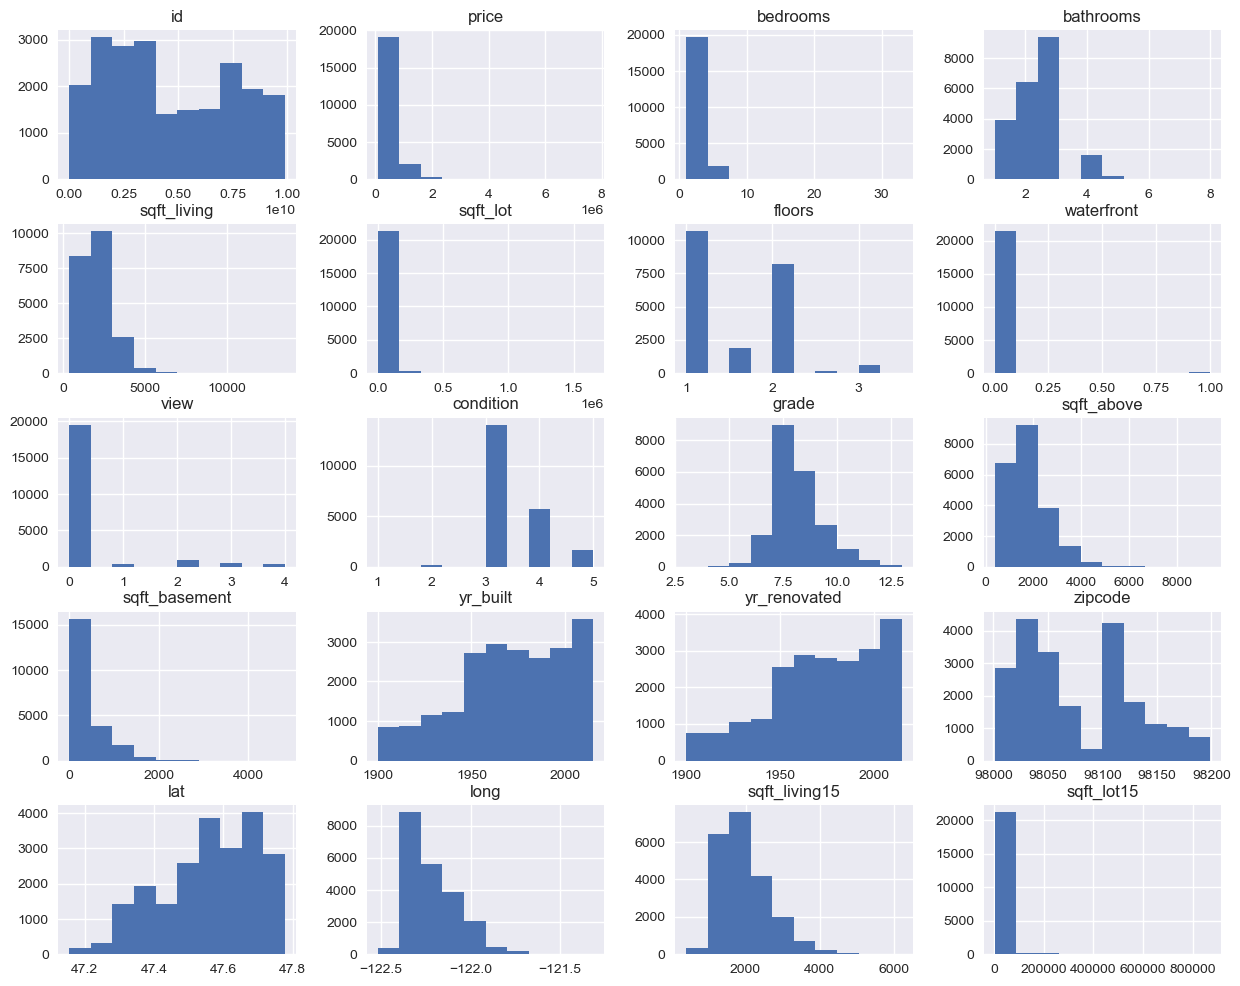

In [54]:
df.hist(figsize = (15,12))
plt.show()

* grade, condition and floors appear to be on a reasonable scale with no apparent outliers.

* Waterfront is a binary 1/10 features.

* I need to consider potential outliers in bedrooms, bathrooms and the sqft-type features.

In [55]:
# Investigate bedrooms
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [56]:
# check on bedrooms with 33
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,2,1620,6000,1.0,0,0,...,7,1040,580.0,1947,1947.0,98103,47.6878,-122.331,1330,4700


The house has 2 bathrooms and a price of 640,000. This seem to indicate 33 might have been an error. Replace it with 3.

In [57]:
# Fix error for bedrooms
df.loc[15856, 'bedrooms'] = 3

In [58]:
# Better to use the interquartile ranges to generalise it instead of the approach above
def remove_outliers(df):
    # define the columns to remove outliers from
    cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15']

    # remove outliers from the specified columns
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        df = df[(df[col] >= q1 - (2.5 * iqr * (len(df[col]) / (len(df[col]) + 1)))) & (df[col] <= q3 + (2.5 * iqr * (len(df[col]) / (len(df[col]) + + 1))))]
    
    # return the modified DataFrame
    return df

In [59]:
df = remove_outliers(df)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18978 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             18978 non-null  int64         
 1   date           18978 non-null  datetime64[ns]
 2   price          18978 non-null  float64       
 3   bedrooms       18978 non-null  int64         
 4   bathrooms      18978 non-null  int32         
 5   sqft_living    18978 non-null  int64         
 6   sqft_lot       18978 non-null  int64         
 7   floors         18978 non-null  float64       
 8   waterfront     18978 non-null  int64         
 9   view           18978 non-null  int64         
 10  condition      18978 non-null  int64         
 11  grade          18978 non-null  int64         
 12  sqft_above     18978 non-null  int64         
 13  sqft_basement  18978 non-null  float64       
 14  yr_built       18978 non-null  int64         
 15  yr_renovated   1897

## EDA

#### Price

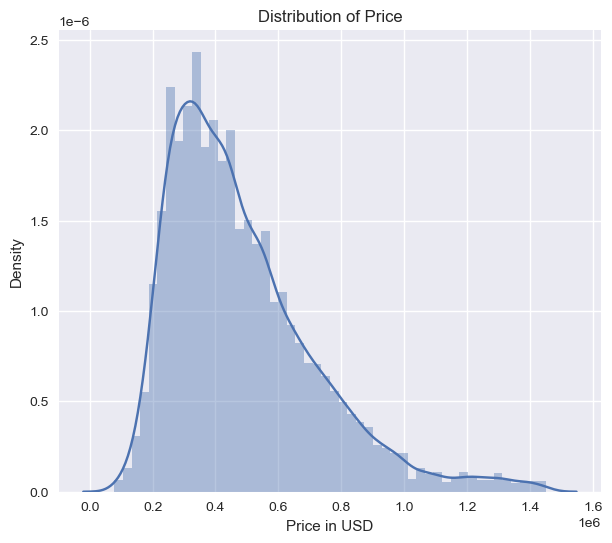

In [61]:
# View price distribution
plt.figure(figsize=(7,6))
dist=sns.distplot(df["price"])
dist.set_title("Price distribution")
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

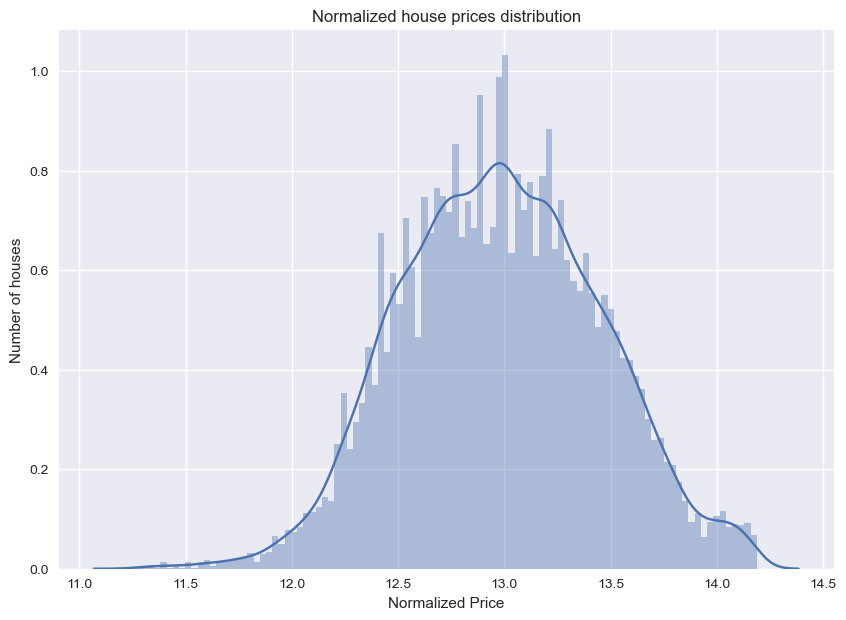

In [62]:
#Normalizing Price Distribution
fig, ax = plt.subplots(figsize=(10, 7))

sns.distplot(np.log(df['price']), bins = 100) 

ax.set_xlabel("Normalized Price")
ax.set_ylabel("Number of houses")
ax.set_title("Normalized house prices distribution")
plt.show()

#### Waterfront

Explore how the waterfront feature influnces the price of a house.

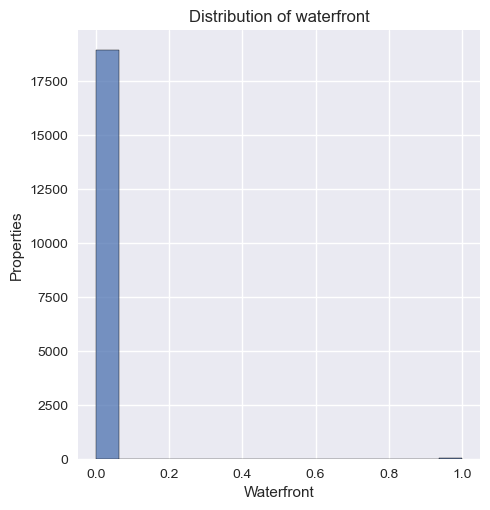

In [63]:
# Distribution of waterfront feature
sns.displot(data=df, x='waterfront')
plt.title('Distribution of waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Properties')
plt.show()

Majority of the properties do not have a waterfront

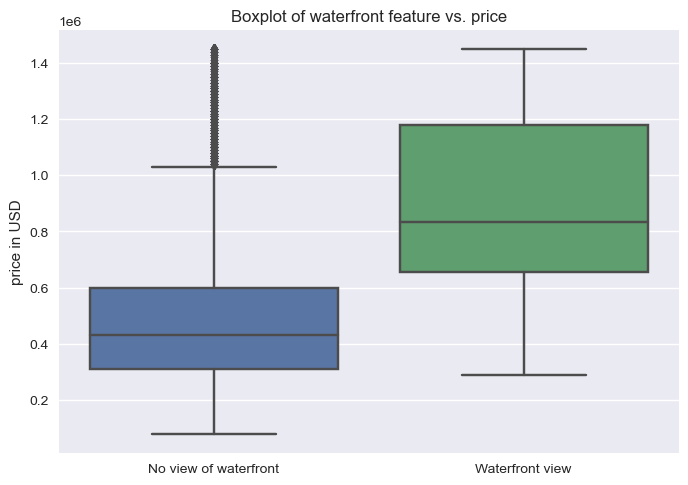

In [64]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df['waterfront'], y = df['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('No view of waterfront', 'Waterfront view'))
plt.show()

In [65]:
waterfrontmean = df[df['waterfront'] == 1]['price'].mean()
nowaterfrontmean = df[df['waterfront'] == 0]['price'].mean()
print(f"The mean  price for a house with waterfront  is  {round(waterfrontmean,2)} USD")
print(f"The mean  price for a house without waterfront is  {round(nowaterfrontmean,2)} USD")
print(f"Percentage of houses with waterfront is: {len(df[df['waterfront'] == 1])/len(df)*100}")

The mean  price for a house with waterfront  is  890690.82 USD
The mean  price for a house without waterfront is  483813.05 USD
Percentage of houses with waterfront is: 0.258193697966066


#### Conclusion
Waterfront has a significant effect on the price with the mean price of houses with waterfront being almost double of those without. However only about 0.20% of houses have a waterfront.

#### House features
These are the features that can be considered to be 'attached' to the house.

In [66]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

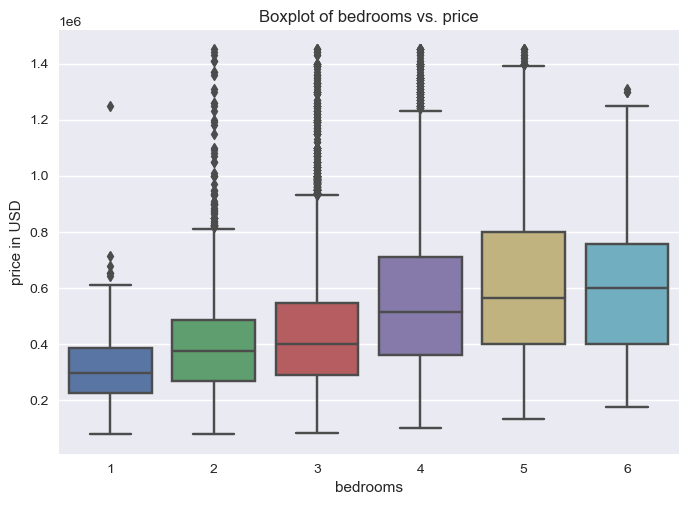

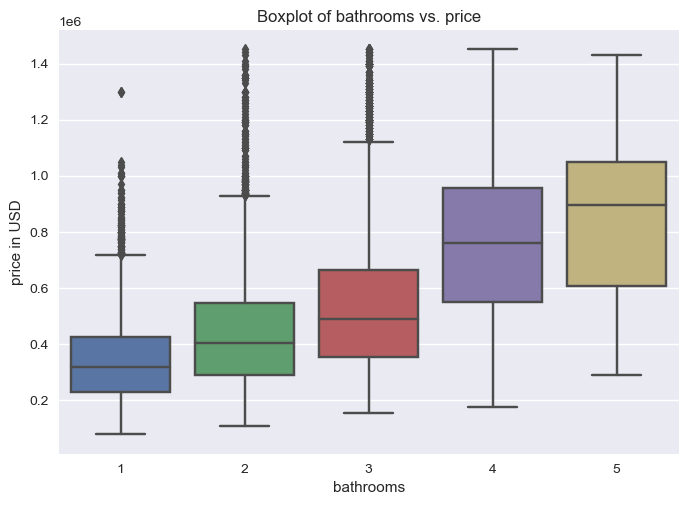

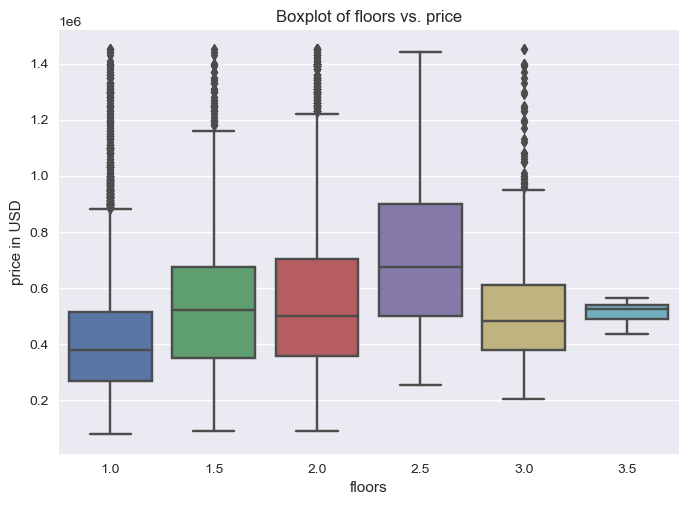

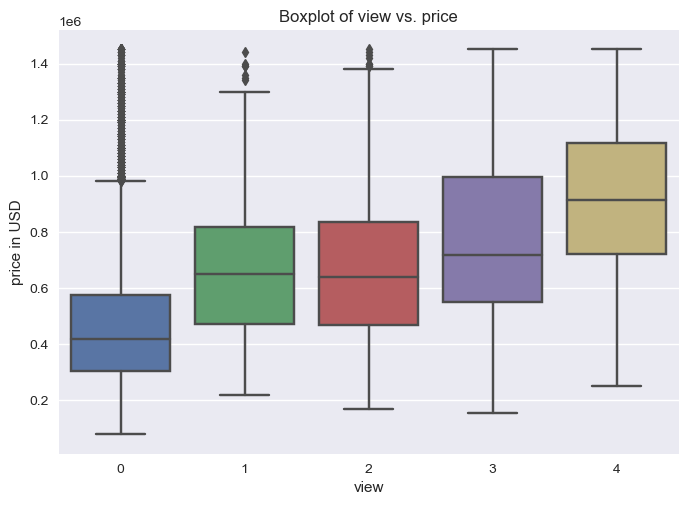

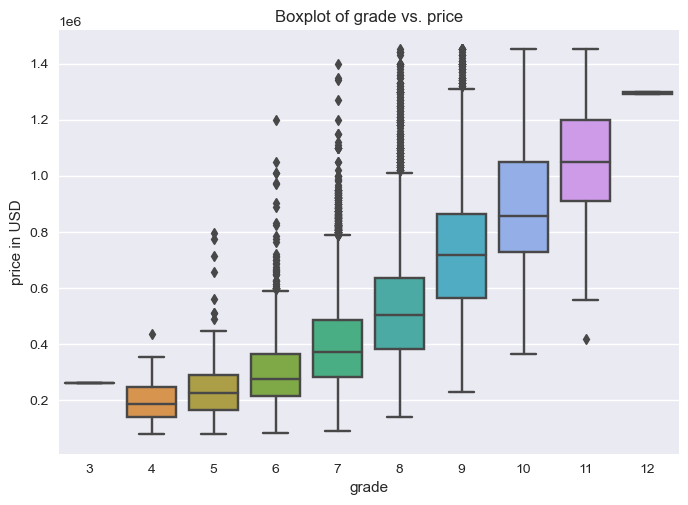

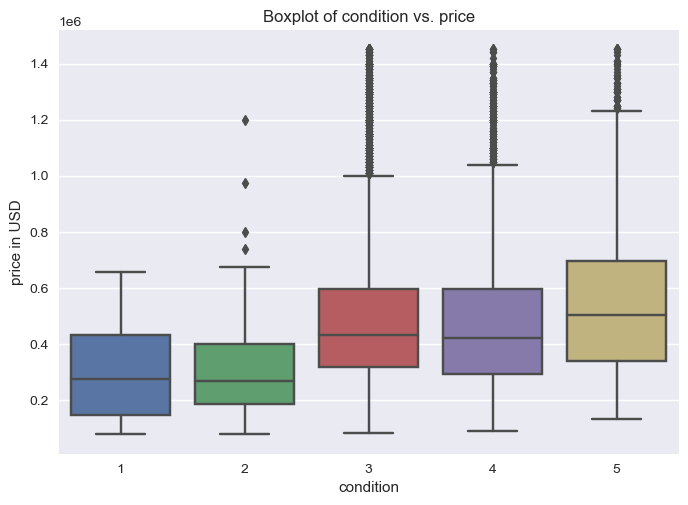

In [67]:
# categorical variables
features = ['bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'condition']

# plot boxplots
for feature in features:
    sns.boxplot(x = df[feature], y = df['price'])
    plt.title(f"Boxplot of {feature} vs. price")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show()

As bedrooms increase so does the price. 5 bedrooms seem to be the most preferred.

As the bathrooms increase the price increases.

Floors also seem to affect the price and 2.5 seems to be the most common.

The view also increases the price with 4: Excellent being the most expensive.

The grade is affecting the price increase.

### Preparing data for modelling

#### Investigate for linearity assumption

I would like to investigate the relationship between price and the continuous variables in our data.
We will use seaborn's jointplot to inspect linearity and distributions.

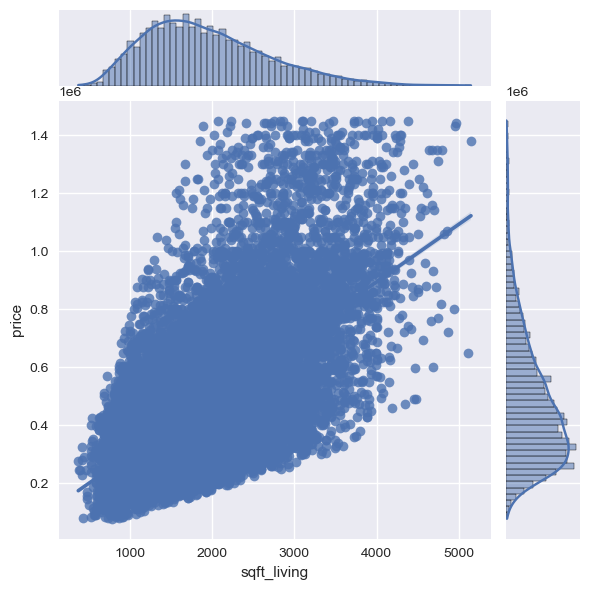

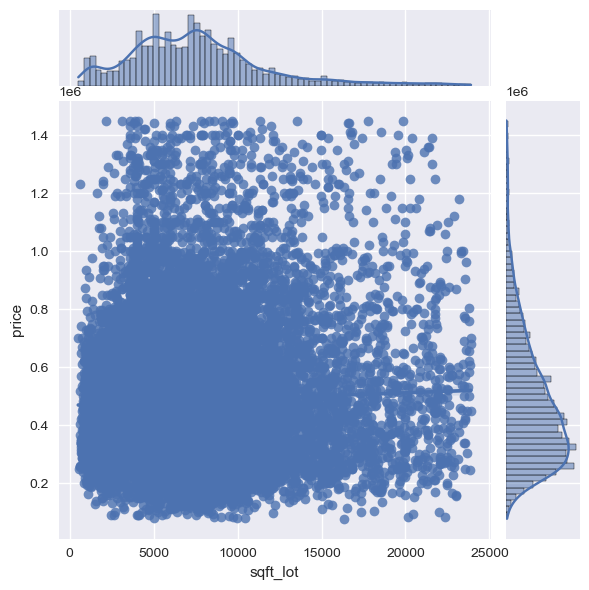

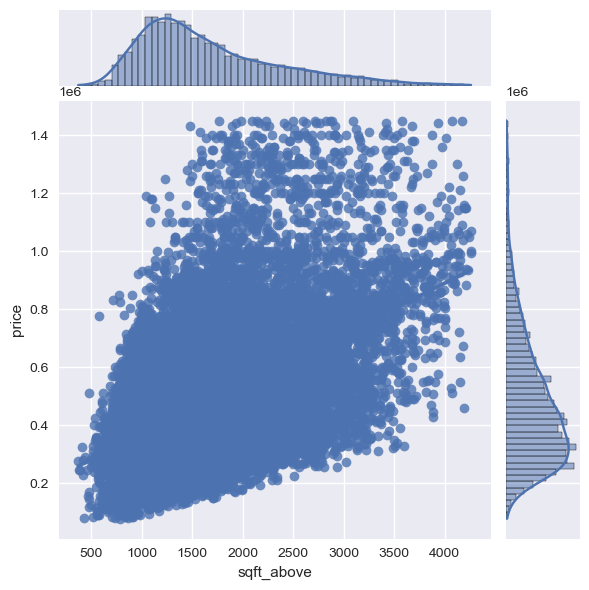

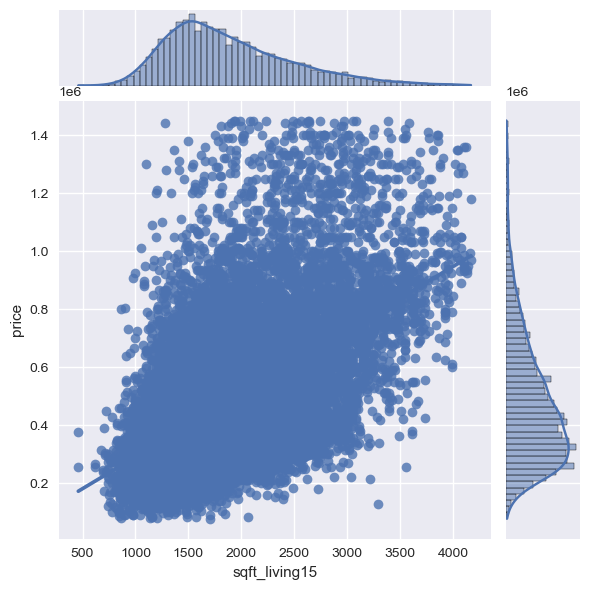

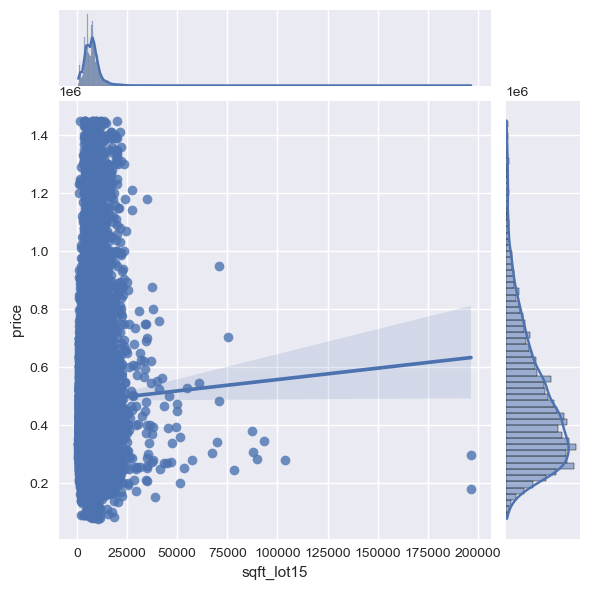

In [68]:
# continuous variables
features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in features:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')
    plt.show()

The features appear to be linear. Multicollinearity will be explored further.
sqft_living and sqft_above show the best linearity with respect to price.

#### Investigating for multicollinearity

I will use a correlation heatmap to investigate

In [69]:
# dropping columns we will not need.
cor_df = df.drop(['yr_renovated','zipcode','lat','long'], axis=1)

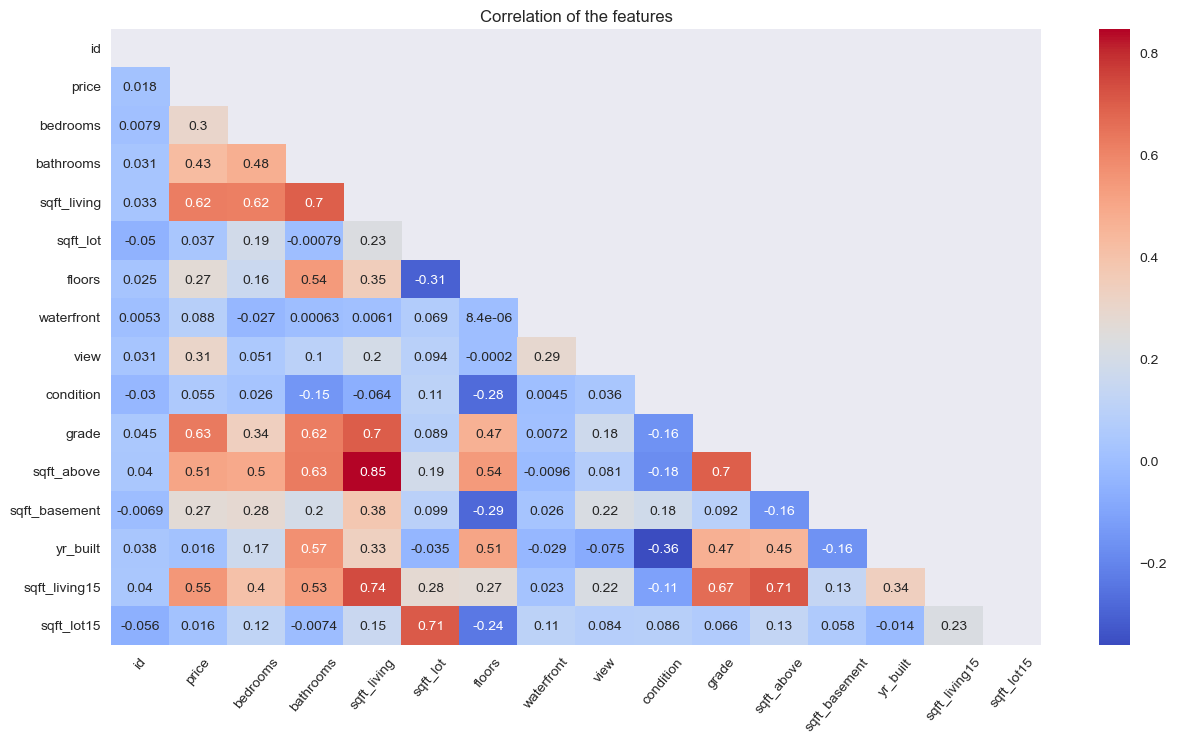

In [70]:
fig, ax = plt.subplots(figsize = (15,8))
mask = np.triu(np.ones_like(cor_df.corr()))
sns.heatmap(cor_df.corr(), cmap="coolwarm", annot=True, mask=mask)
plt.title('Correlation of the features')
plt.xticks(rotation=50)
plt.show()

There are multicollinearity issues which must be solved. sqft_above and sqft_living have a high correlation which is not a surprise because sqft_above is the square footage of the house apart from basement.
I will keep sqft_living because it has more information and then drop sqft_above and sqft_living15.
sqft_lot and sqft_lot15 have a high correlation and I will keep sqft_lot as it is related to the property directly.

In [71]:
# removing the features
df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)

### Modelling
#### Basic Model sqft_living

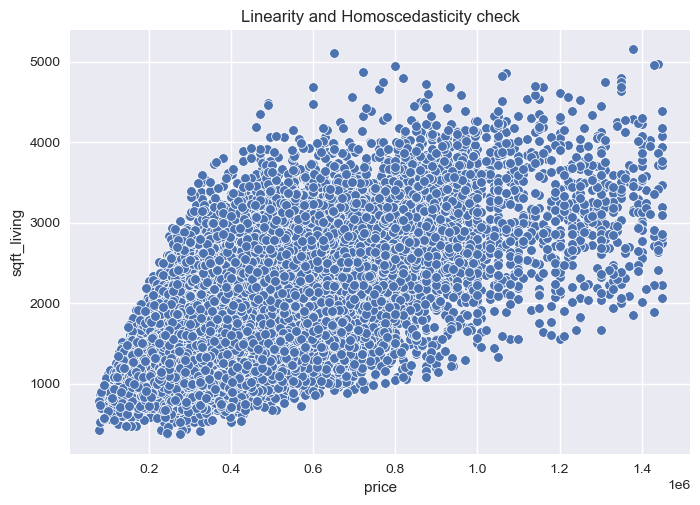

In [72]:
# check for linearity and Homoscedasticity
sns.scatterplot(x=df['price'], y=df['sqft_living'])
plt.title("Linearity and Homoscedasticity check");

In [73]:
# create predictors
predictors = df['sqft_living']
# create model intercept
predictors_int = sm.add_constant(predictors)
# fit model
baseline_model = sm.OLS(df['price'], predictors_int).fit()

# check model
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.193e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:13:57   Log-Likelihood:            -2.5705e+05
No. Observations:               18978   AIC:                         5.141e+05
Df Residuals:                   18976   BIC:                         5.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.011e+05   3759.899     26.888      

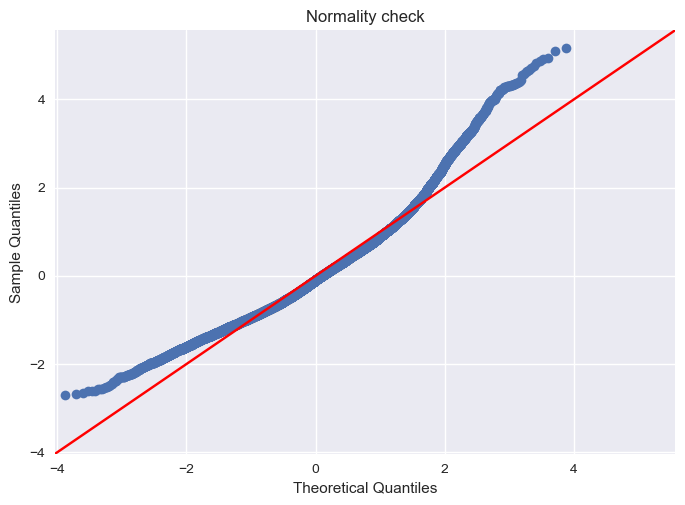

In [74]:
# check normality assumption

residuals = baseline_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

Note that 2/3 of the assumptions of linearity are violated here - the residuals aren't normally distributed, and the data isn't homoscedastic. We'll get a summary of the model as is, see if performing a log transformation on price and sqft_living will help with these conditions, and then see if adding in some other variables to our model will improve our R^2 .

In [75]:
# apply logarithmic function to independant variable
df['log_sqft_living'] = np.log(df['sqft_living'])


# re-create the model with `log_sqft_living`
# create predictors
predictors = df['log_sqft_living']
# create model intercept
predictors_int = sm.add_constant(predictors)
# fit model
log_model1 = sm.OLS(df['price'], predictors_int).fit()

# check model
print(log_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     9972.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:14:03   Log-Likelihood:            -2.5767e+05
No. Observations:               18978   AIC:                         5.153e+05
Df Residuals:                   18976   BIC:                         5.154e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.173e+06   2.66e+04    -

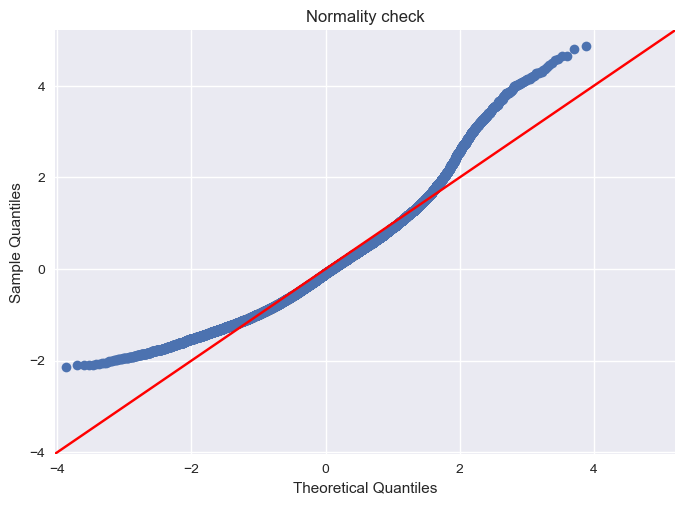

In [76]:
residuals = log_model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

In [77]:
# apply logarithmic function to dependant variable
df['log_price'] = np.log(df['price'])


# re-create the model with `sqft_living`
# create predictors
predictors = df['sqft_living']
# create model intercept
predictors_int = sm.add_constant(predictors)
# fit model
log_model2 = sm.OLS(df['log_price'], predictors_int).fit()

# check model
print(log_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                 1.140e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:14:11   Log-Likelihood:                -8040.0
No. Observations:               18978   AIC:                         1.608e+04
Df Residuals:                   18976   BIC:                         1.610e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2313      0.008   1624.215      

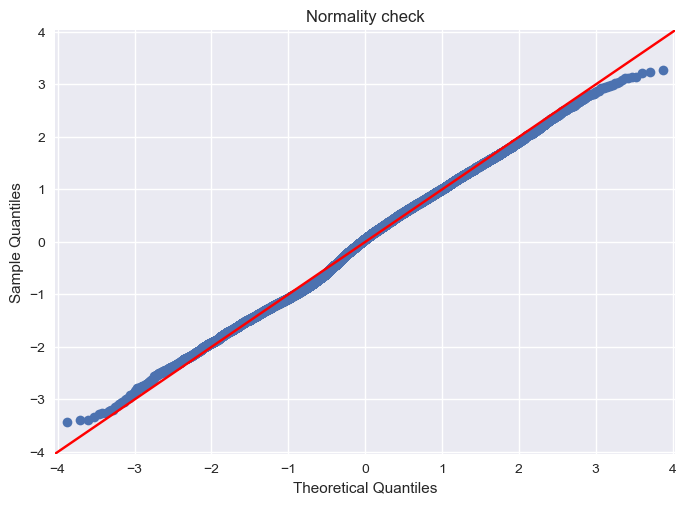

In [78]:
residuals = log_model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

In [79]:
# apply logarithmic function to dependant variable
df['log_price'] = np.log(df['price'])

# re-create the model with 'sqft_living'
# create predictors
predictors = df['sqft_living']
# create model intercept
predictors_int = sm.add_constant(predictors)
# fit model
log_model12 = sm.OLS(df['log_price'], predictors_int).fit()

# check model
print(log_model12.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                 1.140e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:14:18   Log-Likelihood:                -8040.0
No. Observations:               18978   AIC:                         1.608e+04
Df Residuals:                   18976   BIC:                         1.610e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2313      0.008   1624.215      

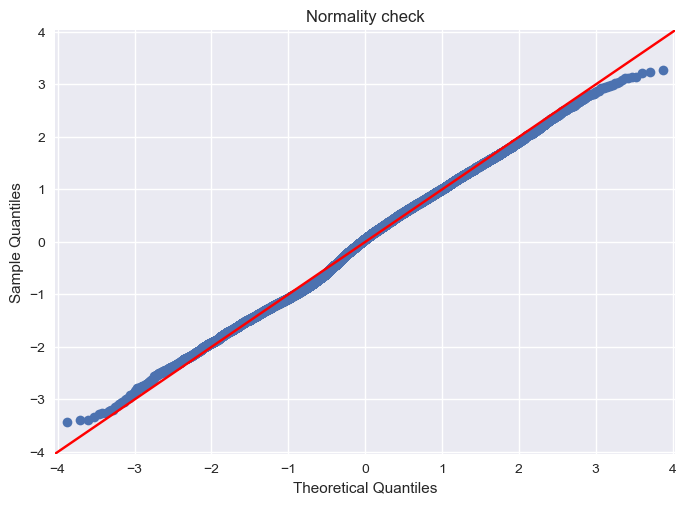

In [80]:
residuals = log_model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

### Bedrooms

In [81]:
# create predictors
predictors = df[['sqft_living', 'bedrooms']]

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model
second_model = sm.OLS(df['log_price'], predictors_int).fit()

# check model
print(second_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     5903.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:14:25   Log-Likelihood:                -7914.0
No. Observations:               18978   AIC:                         1.583e+04
Df Residuals:                   18975   BIC:                         1.586e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.3515      0.011   1162.449      

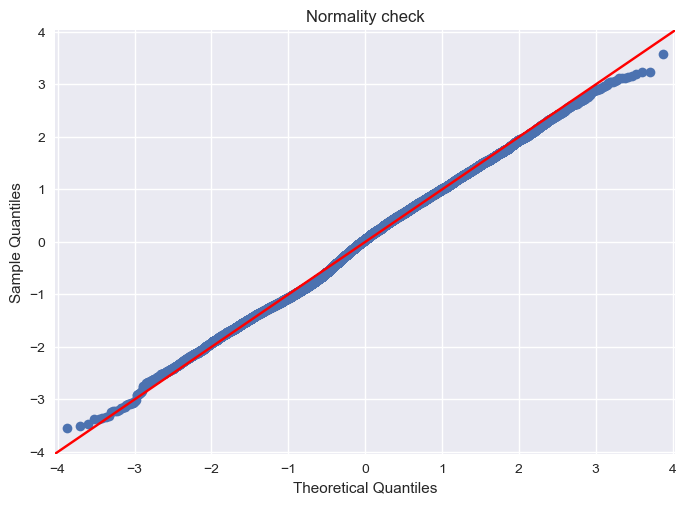

In [82]:
# check normality assumption

residuals = second_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

### Grade

In [83]:
# Creating a simple linear model using grade
y = df["price"]
x = df[["grade"]]
model_grade = sm.OLS(endog=y, exog=sm.add_constant(x))
grade_results = model_grade.fit()
print(grade_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                 1.261e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:14:33   Log-Likelihood:            -2.5684e+05
No. Observations:               18978   AIC:                         5.137e+05
Df Residuals:                   18976   BIC:                         5.137e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.161e+05   9892.790    -62.280      0.0

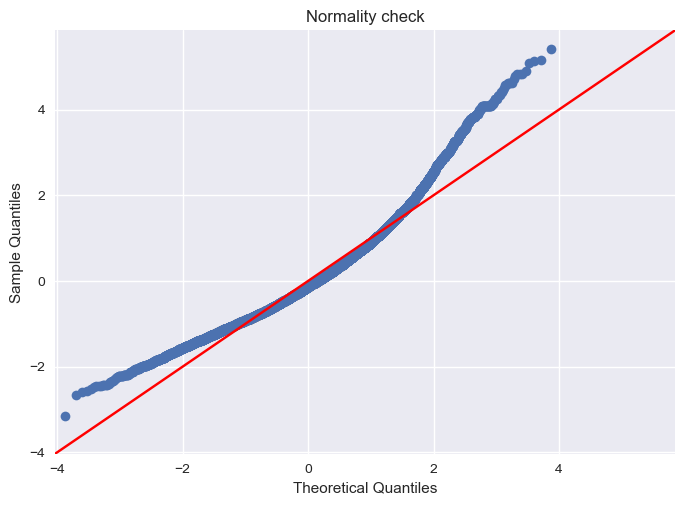

In [84]:
# check normality assumption

residuals = grade_results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

### Multiple Linear Regression

In [85]:
x = df[['sqft_living', 'bedrooms', 'yr_built', 'grade']]
y = df['price']
predictors_int = sm.add_constant(x)
# fit model
multilinear = sm.OLS(df['price'], predictors_int).fit()

# check model
print(multilinear.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     6215.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:14:40   Log-Likelihood:            -2.5373e+05
No. Observations:               18978   AIC:                         5.075e+05
Df Residuals:                   18973   BIC:                         5.075e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.971e+06   8.03e+04     61.903      

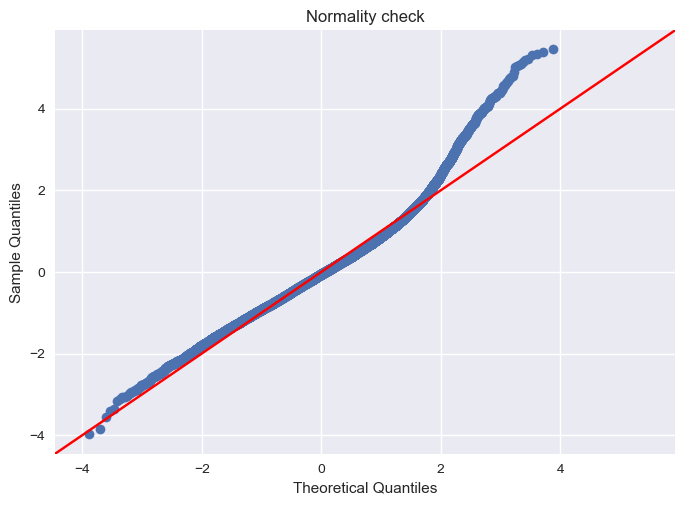

In [86]:
# check modality assumption

residuals = multilinear.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()


* R-squared value is 0.568, which means that 56.8% of the variation in the price can be explained by the independent variables in the model.

* F-statistic is 6126, which is a very high value and indicates that the model is a good fit for the data.

* sqft_living: This coefficient represents the effect of one unit increase in square footage on the price, holding all other variables constant. The coefficient is 131.4278, which means that a one-unit increase in square footage is associated with an increase in price of $131.43.

* bedrooms: This coefficient represents the effect of one additional bedroom on the price, holding all other variables constant. The coefficient is -2.13e+04, which means that adding one more bedroom is associated with a decrease in price of $21,300.

* yr_built: This coefficient represents the effect of one year increase in the year built on the price, holding all other variables constant. The coefficient is -2851.3244, which means that a one-year increase in the year built is associated with a decrease in price of $2,851.

* grade: This coefficient represents the effect of one unit increase in the grade on the price, holding all other variables constant. The coefficient is 1.253e+05, which means that a one-unit increase in the grade is associated with an increase in price of $125,300.

### Results and Conclusion

* From our model, we can conclude that sqft_living, bedrooms, yr_built and grade are affecting the price of the house.

* There are limitations to the model. To meet our assumptions, we had to try log-transformation on some variables.


### Recommendations
* Build houses that have a high grade rating.

* Target houses with a big living square footage.

* The bedrooms are also a factor in the price so they can look for buildings with atleast 4 bedrooms.

### Next Steps
* Increase the size of data.

* Test the predictions against test data